In [1]:
#makalede çok iyi anlatılmış
#https://yigitsener.medium.com/makine-%C3%B6%C4%9Frenmesinde-python-ile-basit-do%C4%9Frusal-regresyon-modelinin-kurulmas%C4%B1-ve-yorumlanmas%C4%B1-4cf918e1adf

In [2]:
#ayrıca not: Kritik değerin 0,05 seçildiğin bir araştırmada 0,05’ten küçük bir p-değeri istatistiksel olarak 
#anlamlıdır. Boş hipotezin doğru olma olasılığı %5’ten az olduğundan, sıfır hipotezine karşı güçlü kanıtlar 
#gösterir. Bu nedenle sıfır hipotezini reddeder ve alternatif hipotezi kabul ederiz. 
#Ancak bu durum, alternatif hipotezin doğru olma olasılığının %95 olduğu anlamına gelmez.
#P-değeri, sıfır hipotezinin doğru olmasına bağlıdır, ancak alternatif hipotezin doğruluğu veya yanlışlığı ile
#ilgisi yoktur. 0,05’ten yüksek bir p-değeri istatistiksel olarak anlamlı değildir ve sıfır hipotezi için
#güçlü kanıtlara işaret eder. Bu, sıfır hipotezini koruduğumuz ve alternatif hipotezi reddettiğimiz anlamına gelir.


In [1]:
import pandas as pd
ad = pd.read_csv("Advertising.csv")
df=ad.copy()
df.head()

#bazen, dfte 0. indexi değişken olarak yazabilir (unnamed:0)
#bunun 1. çözümü bir alt satırda. 
#2. çözümü--->>>  ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
#niye 1 2 3 4 ? çünkü gerçek değişken sayısı 4e kadar.

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
len(df)

200

In [5]:
df = df.iloc[:,1:len(df)]

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.info

<bound method DataFrame.info of         TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
df.isnull().values.any()

False

In [10]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


/Users/tuanakara/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


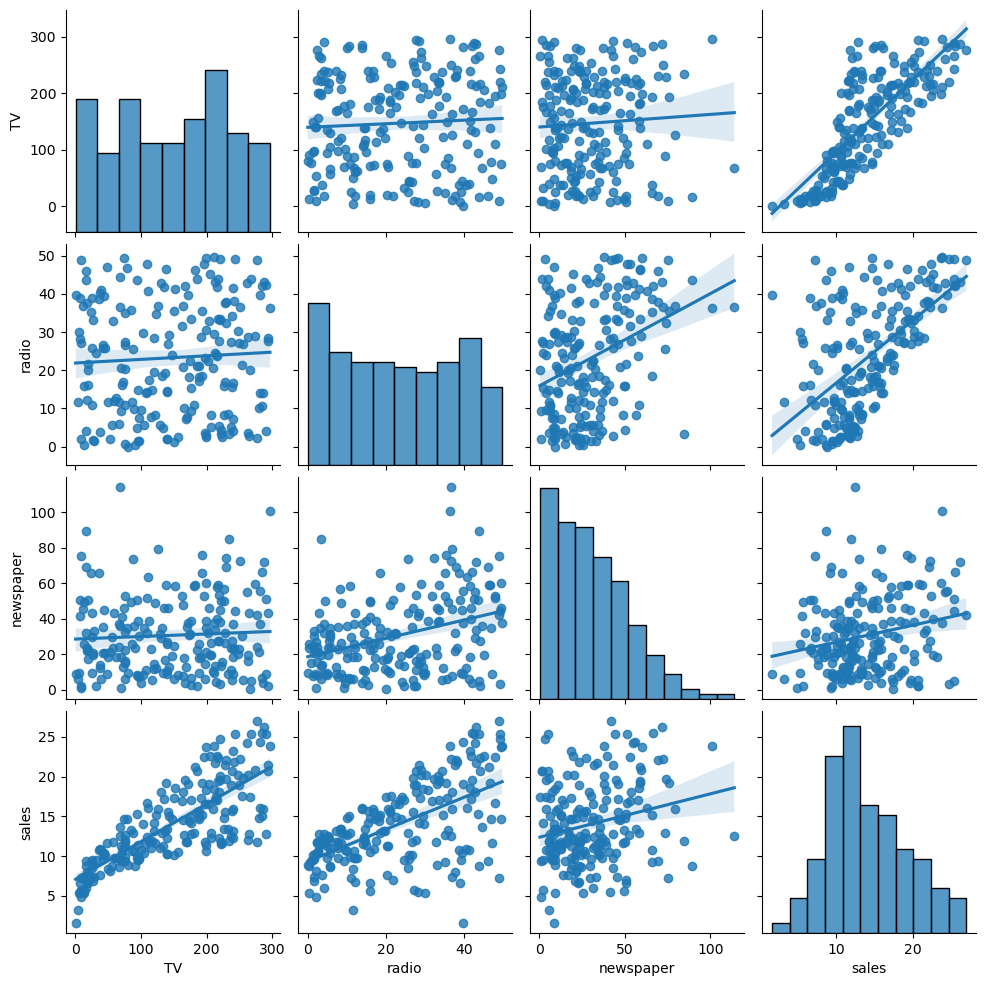

In [11]:
import seaborn as sns
sns.pairplot(df, kind="reg");

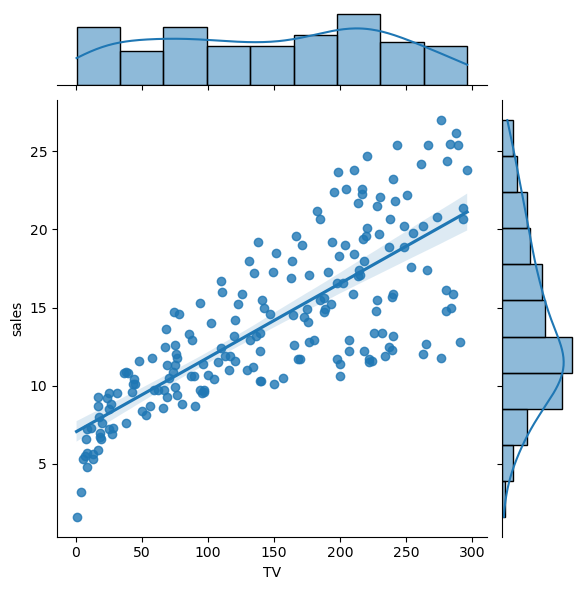

In [12]:
sns.jointplot(x="TV", y="sales", data=df, kind="reg")

STATS MODEL İLE MODELLEME

In [13]:
import statsmodels.api as sm

In [14]:
X=df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [15]:
X=df["TV"]
X[0:5]

#üsttekiyle farkını merak ettim :)

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [16]:
X = sm.add_constant(X)
# X matrisi tek değişkenli. Matris işlemleri yapılabilmesi için sabit 1 constant değişkeni ekliyoruz.

In [17]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [18]:
y=df["sales"]

In [19]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [20]:
lm= sm.OLS(y,X)
# OLS linear reg. coeff. belirler. Bağımsız değişkenler arasındaki ilişkiyi tanımlar.

In [21]:
model = lm.fit()
#.fit() used to train a machine learning model on a dataset, and then fits the model to the data.

#The fit() method takes the training data as arguments, which can be one array in the case of 
#unsupervised learning, or two arrays in the case of supervised learning

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           1.47e-42
Time:                        15:05:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#2. YOL

import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           1.47e-42
Time:                        15:05:16   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model.params
#parametreler

Intercept    7.032594
TV           0.047537
dtype: float64

In [25]:
model.summary().tables[1]
#2 üstteki satırdan 0 1 2 . index arasından 1.yi seçtik

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [26]:
model.conf_int()
#modelin güven aralığı  (yuvarlamış olabilir)

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [27]:
model.f_pvalue
#modelin anlamlılığına ilişkin pvalue değeri

1.467389700194626e-42

In [28]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [29]:
print("fvalue: ", "%.4f" % model.fvalue)

fvalue:  312.1450


In [30]:
print("tvalue: ", "%.4f" % model.tvalues[0:1])

tvalue:  15.3603


/var/folders/j2/zgzqfshj1h175b_1xr21cjg00000gn/T/ipykernel_4270/1358402451.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("tvalue: ", "%.4f" % model.tvalues[0:1])


In [31]:
model.mse_model
#ort 14 olan değişken için birim başına yapılacak hata = 3314.61 korkunç bir sayı.

3314.6181668686495

In [32]:
model.rsquared_adj
#açıklanabilirlik oranı gerçek hayata uygun, fena değil.

0.6099148238341625

In [33]:
# modelin tahmin ettiği değerlere erişmek
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [34]:
# gerçek değerler
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [35]:
print("Sales = " + str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

#mülakatlarda yukardakinin işlemini isteyebilirlermiş(aşağıdaki)

Sales = 7.03 + TV*0.05


#üstteki print görsel olarak ne ifade ediyor bakalım

g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0);


#erroru çözemedim!

In [36]:
#burdan da model kurabiliriz
from sklearn.linear_model import LinearRegression

In [37]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)
model.intercept_
model.coef_

array([0.04753664])

In [38]:
model.score(X,y)  
#başarı tahmin değil, r2 (rkare) değeri  

0.611875050850071

In [39]:
#bu ifadeyi çok kullanıcaz
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

Sales = 7.03 + TV*0.04
Örnek: 30 birim TV harcaması olduğunda satışların tahmin değeri ne olur?

In [40]:
7.03 +30*0.04

8.23

In [41]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)
#model.intercept_
#model.coef_

In [42]:
model.predict([[30]])

/Users/tuanakara/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [43]:
yeni_veri= [[5], [90], [200]]

In [44]:
model.predict(yeni_veri)

/Users/tuanakara/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 7.27027675, 11.31089119, 16.53992164])

***DİĞER VIDEO
Artıklar ve Makine Öğrenmesindeki Önemi

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [47]:
mse = mean_squared_error(y, model.fittedvalues)
#gerçek değer ile (y) tahmin edilen değer(model.fitted... ) arasındaki farkların karelerinin ortalaması

In [48]:
mse

10.512652915656757

In [49]:
import numpy as np
rmse = np.sqrt(mse)

In [50]:
rmse

3.2423221486546887

In [51]:
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [52]:
#reg ile model predictin ne farkı var ???
model.predict(X)[0:10]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
5     7.446162
6     9.765950
7    12.746498
8     7.441409
9    16.530414
dtype: float64

In [53]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [54]:
k_t = pd.DataFrame({"gercek_y":y[0:10], "tahmin_y":reg.predict(X)[0:10]})
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [55]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t
#tabloda - değerler var. ama kaybolacak. o yüzden karelerini alalım.

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [56]:
k_t["hata_kare"] = k_t["hata"]**2

In [57]:
np.sum(k_t["hata_kare"])
#toplam hata kare

92.90350329638105

In [58]:
np.mean(k_t["hata_kare"])
#toplam hata kare ortalaması

9.290350329638105

In [59]:
np.sqrt(np.mean(k_t["hata_kare"]))
#toplam hata kare ortalaması karekökü

3.048007599996776

In [60]:
#mesela ağaç modellerinde üstteki df tablosundaki hataların üzerine bir daha model kurulurmuş.
#böylece hata küçültülmeye çalışılırmış. ve işlem tekrarlanırmış
#yani modeller serisi kurularak hataların optimizasyonu yapılırmış.

#MLde amaç bu hataları minimum yapmak

In [61]:
#üstteki mse ya da rmse değerini hata payı olarak sunmak yanlışmış.
#hataların dağılımına bakılmalıymış. mesela modelin %95i 0.01 hata, kalanı daha yüksek hatalı olabilirmiş.
#sadece mse rmse değerlerine bakılarak başarı anlaşılmaz. onlar da önemli tabi temel sonuçta.

In [62]:
model.resid[0:10]
#artıklar

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

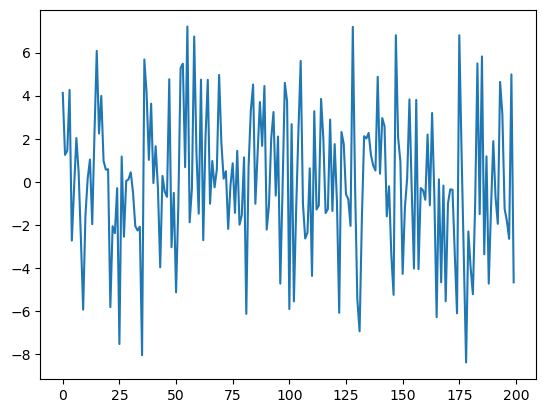

In [63]:
import matplotlib.pyplot as plt
plt.plot(model.resid)

# ÇOKLU DOĞRUSAL REGRESYON DERSİ

In [64]:
import pandas as pd
ad= pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [65]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [66]:
X = df.drop("sales", axis=1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20, random_state=42)

#train test setleri oluşturduk ve 1 taneye eşitledik. parametreler sırasıyla bağımlı değişken, bğımsız dğşk,
#test size toplam train-test in %20 si test olsun dedik ayırttık, her defasına farklı sonuç getirmesin diye de 
#random state yazdık ve öylesine 42ye eşitledik.

#bu test. train setlerini bu şekilde ayrı ayrı oluşturmamızı öneriyor.

In [67]:
X_train.shape

(160, 3)

In [68]:
X_test.shape

(40, 3)

In [69]:
y_train.shape

(160,)

In [70]:
y_test.shape

(40,)

In [71]:
training=df.copy()

In [72]:
training.shape
#bu da ilk hali
#üsttekiler bölünmüş hali

(200, 4)

In [73]:
lm = sm.OLS(y_train, X_train)

In [74]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):                   1.28e-137
Time:                        15:05:17   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


### scikit learn model

In [76]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [77]:
model.intercept_

2.9790673381226274

In [78]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [79]:
yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [80]:
model.predict(yeni_veri)

/Users/tuanakara/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.32334798])

In [81]:
yeni_veri = [[30], [10], [40]]

In [82]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [83]:
rmse

1.6447277656443373

In [84]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [85]:
rmse

1.7815996615334506

# MODEL TUNING / MODEL DOĞRULAMA

In [86]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [87]:
X = df.drop("sales", axis=1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.20, random_state=42)

lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [88]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.6447277656443373

In [89]:
model.score(X_train, y_train)

0.8957008271017817

In [90]:
cross_val_score(model, X_train, y_train, cv=10, scoring="r2")

array([-0.10975169,  0.87992761,  0.88460907,  0.95616404,  0.93017934,
        0.92369938,  0.86467693,  0.95081368,  0.7622523 ,  0.87097792])

In [91]:
cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()

0.7913548596916339

In [92]:
np.sqrt(-cross_val_score(model, X_train, y_train, cv=10, scoring="neg_mean_squared_error"))

array([2.36072749, 1.69185011, 1.43702708, 1.04492575, 1.28902985,
       1.58333206, 1.71120332, 1.41847523, 2.68793677, 1.28901607])

In [93]:
np.sqrt(-cross_val_score(model, X_test, y_test, cv=10, scoring="neg_mean_squared_error").mean())

1.8710410072162282